# Важно!

Придерживайтесь эталонного вывода в коде каждого задания, чтобы избежать расхождений в трактовках условий задания.

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [2]:
# Создаем массив numpy
a = np.arange(1,101)
print(a)
# Переформатируем его
reshaped_a= a.reshape(10,10)
print(reshaped_a)
# Сделаем слайсинг с шагом 2 по каждой оси
slice_reshaped_a = reshaped_a[::2,::2]
print(slice_reshaped_a)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
[[ 1  3  5  7  9]
 [21 23 25 27 29]
 [41 43 45 47 49]
 [61 63 65 67 69]
 [81 83 85 87 89]]


## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов. (Для соответсвия примеру вывода используйте длину length = 100_000_000)

Реализуйте задачу с и без помощи numpy, сравните время выполнения

Используйте выражение 


`%%time` 

в первой строчке ячейки кода для отображения времени выполнения ячейки

Если возникамют ошибки с %%time - используйте код

`
from datetime import datetime
start_time = datetime.now()
---ваш код---
print(datetime.now() - start_time)
`

In [3]:
%%time
# решение с использованием numpy
# для оценки времени исоплнения блока
# зададим длину нашей последовательности
length = 100_000_000

# ваш код тут
# Создаем последовательность заданой длины
sequence = np.arange(length)
print(sequence)

# Определяем среднее арифметическое
print(np.mean((sequence)))


[       0        1        2 ... 99999997 99999998 99999999]
49999999.5
Wall time: 287 ms


In [4]:
%%time
# решение без использования numpy
# для оценки времени исоплнения блока
length = 100_000_000
# ваш код тут
# Создаем последовательность заданой длины
# Создатели задания не упомянули проблему что если не указывать тип создаваемого массива при большой длине, а оставить его int то такой код будет считать неправильно
# из за переполнения int
# sequence = np.arange(length)
# summa = sum(sequence)
# print(summa/len(sequence))
#sequence = np.arange(length,dtype=np.float64)
sequence = range(length)
# ваш код тут
# Сумируем последовательность с помощью встроенной функции python
summa = sum(sequence)
print(summa/len(sequence))


49999999.5
Wall time: 3.63 s


Если все сделано верно, то можно заметить, что у нампай скорость выполнения (total: 546 ms) заметно выше питона (total: 16.2 s)
Странно у меня получились гораздо меньшие цифры numpy 209 ms а чистый питон  2.78 s.

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

Изначальный код:

`
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
`

In [5]:
# задано изначально
# генерируем один и тот же список
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))

# ваш код тут
# Создаем маску
mask = s > 5
# Сортируем используя маску
sorted_s = s[mask].sort_values()
# Выводим первый индекс полученной серии
print(sorted_s.index[0])

67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен. Важно! Графики решений других слушателей могут незначительно отличаться из-за генерации случайных пропусков.


```

# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# ваш код тут
# список а содержит пропуски, его надо восстановить

# ВАШ КОД ТУТ

# отобразим
plt.plot(a)

```

Реализация используя python

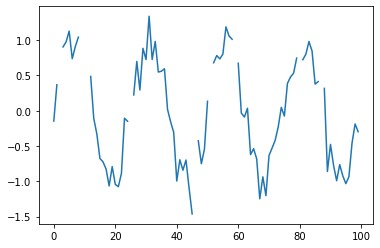

In [6]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# ваш код тут
# список а содержит пропуски, его надо восстановить
# Создаем цикл в котором перебираем значения
  
# отобразим график с пропусками
plt.plot(a);

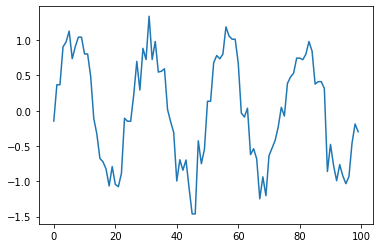

In [7]:
# А теперь используя python
for i in range(1,len(a)):
    # Если значени Nan, то заменяем его на предыдущее значение в списке.Перебор начинается с элемента с индексом 1,
    # чтобы избежать ошибки если Nan окажется на нулевом индексе.
    if np.isnan(a[i]):
        a[i] = a[i-1]   
plt.plot(a);

Реализация через matplotlib

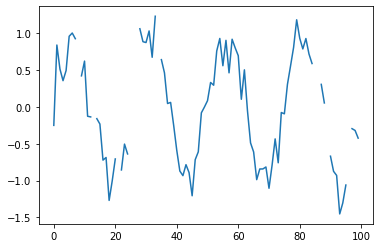

In [9]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

# создадим датафрейм из списка а, он содержит пропуски
df = pd.DataFrame({'target':a})

# ВАШ КОД ТУТ

# отобразим c пропусками
plt.plot(df.target.values)

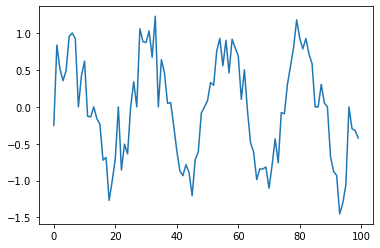

In [10]:
# Отобразим без пропусков
df.fillna(0,inplace=True)
plt.plot(df.target.values);

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [17]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [15]:
# все, кто старше 40
df[df['возраст']>=40]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [16]:
# все, кто имеет доход выше среднего по датасету
df[df['доход']> df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [18]:
# все, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету
df[(df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [22]:
# Создать новый столбец важность клиента = доход * надежность
df['важность клиента'] = df['доход']*df['надежность клиента (0..1)']
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента
0,Петя,45,100000,0.65,муж,65000.0
1,Вася,26,80000,0.74,муж,59200.0
2,Аня,41,150000,0.87,жен,130500.0
3,Света,21,60000,0.68,жен,40800.0


In [24]:
# Создать новый столбец возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)
df['возможная долгосрочность клиента'] = df['важность клиента'] *(df['возраст'].mean() - df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Используя материалы блока Exploratory data analysis материалов 2го модуля вывести имена всех выживших детей (до 18 лет) и их количество

Изначальный код:

data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

In [25]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [27]:
# отображаем количество выживших детей

# ваш код тут
quntity_children = data[(data['Survived'] == 1) & (data['Age'] < 18)]
print(f'Количество выживших детей равно {len(quntity_children)}')

Количество выживших детей равно 65


In [29]:
# отображаем их имена

# ваш код тут
# чтобы было чуть красивее сконвертируем серию в датафрейм
quntity_children['Name'].to_frame()

,Name
9,Mrs. Nicholas (Adele Achem) Nasser
10,Miss. Marguerite Rut Sandstrom
22,Miss. Anna McGowan
39,Miss. Jamila Nicola-Yarred
42,Miss. Simonne Marie Anne Andree Laroche
...,...
826,Mrs. Antoni (Selini Alexander) Yasbeck
827,Master. George Sibley Richards
849,Miss. Mary Conover Lines
865,Master. Harold Theodor Johnson
